In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [3]:
shuffle = False
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/content/drive/MyDrive/datasets/movie.csv', sep=",")
X = dataset["text"]
y = dataset["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=shuffle)

X_train, y_train

(0       I grew up (b. 1965) watching and loving the Th...
 1       When I put this movie in my DVD player, and sa...
 2       Why do people who do not know what a particula...
 3       Even though I have great interest in Biblical ...
 4       Im a die hard Dads Army fan and nothing will e...
                               ...                        
 7995    *May contain spoilers*<br /><br />I bent over ...
 7996    Be very afraid of anyone who likes this film. ...
 7997    Can they possibly get any worse than this? Pro...
 7998    I give it a 2, because of the beautiful Medite...
 7999    I'm not a fan of Adam Sandler. In fact, I don'...
 Name: text, Length: 8000, dtype: object, 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7995    0
 7996    0
 7997    0
 7998    0
 7999    1
 Name: label, Length: 8000, dtype: int64)

In [4]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input, Bidirectional

vectorize_layer = TextVectorization(
    max_tokens=50000,
    standardize="lower_and_strip_punctuation"
)
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=32))

model.add(Bidirectional(LSTM(64, activation='softsign')))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 32)          1600000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,653,825
Trainable params: 1,653,825
Non-

In [5]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, callbacks=[history_Adam, early_stopping])

Epoch 1/20
80/80 [==============================] - 322s 4s/step - loss: 0.6737 - accuracy: 0.5771 - val_loss: 0.6612 - val_accuracy: 0.5679
Epoch 2/20
80/80 [==============================] - 316s 4s/step - loss: 0.4625 - accuracy: 0.8090 - val_loss: 0.4668 - val_accuracy: 0.7903
Epoch 3/20
80/80 [==============================] - 300s 4s/step - loss: 0.2440 - accuracy: 0.9120 - val_loss: 0.6775 - val_accuracy: 0.7535
Epoch 4/20
80/80 [==============================] - 305s 4s/step - loss: 0.1415 - accuracy: 0.9546 - val_loss: 0.5814 - val_accuracy: 0.7987
Epoch 5/20
80/80 [==============================] - 317s 4s/step - loss: 0.0654 - accuracy: 0.9820 - val_loss: 0.7912 - val_accuracy: 0.7946
Epoch 5: early stopping


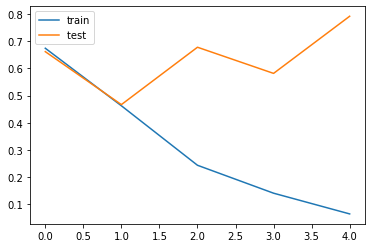

In [6]:
import matplotlib.pyplot as plt

plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")

plt.legend()
plt.show()

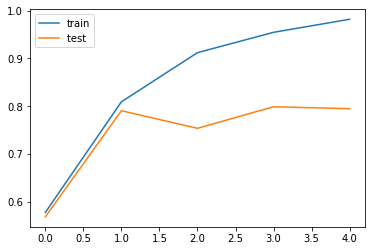

In [7]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")

plt.legend()
plt.show()


In [8]:
model.evaluate(X_test,y_test)

1000/1000 [==============================] - 180s 180ms/step - loss: 0.7912 - accuracy: 0.7946


[0.7911996841430664, 0.7945937514305115]